# Multi-Site Unit Cells
## Blog Post 2

In [1]:
# importing our packages
Pkg.add("PyPlot");
Pkg.update();
using PyPlot;

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Updating METADATA...
INFO: Updating cache of Compat...
INFO: Computing changes...
INFO: Upgrading Compat: v0.7.7 => v0.7.8


In [46]:
lattice="kagome";

Nx=5;
Ny=5;
Nz=1;

In [47]:
# A cell to just evaluate
# This one sets the unit vectors (a,b,c) for the different unit cells
# Can you guess what a lattice will look like by looking at the vectors?
if(lattice=="honeycomb")
    d=2;
    Ncell=2;
    unit=[[0 0 0]
        [cos(π/6) sin(π/6) 0]];
    a=[2*cos(π/6),0,0];
    b=[cos(π/6),1+sin(π/6),0];
    c=[0,0,1];
elseif(lattice=="kagome")
    d=2;
    Ncell=3;
    unit=[[0 0 0]
          [1 0 0]
          [cos(π/3) sin(π/3) 0]];
    a=[2,0,0];
    b=[2*cos(π/3), 2*sin(π/3), 0];
    c=[0,0,1];
elseif(lattice=="pyrochlore")
    
    
else
    println("Please have a correct lattice")
end

3-element Array{Int64,1}:
 0
 0
 1

In [42]:
# Another cell to just evaluate
# Here we set up some numbers and matrices for our computation
N=Nx*Ny*Nz*Ncell;    #The total number of sites
aM=transpose(repeat(a,outer=[1,Ncell]));
bM=transpose(repeat(b,outer=[1,Ncell*Nx])); #these allow us to copy an entire row or layer at once
cM=transpose(repeat(c,outer=[1,Ncell*Nx*Ny]));

X=Array{Float64}(N,3);  #where we store the positions

108x3 Array{Float64,2}:
   0.0             5.90328e-316    5.58923e-316
   5.90159e-316    5.89764e-316    5.89939e-316
 NaN               6.93457e-310    6.93457e-310
   0.0           NaN               1.4822e-322 
   0.0             1.73249e-316    1.73249e-316
   0.0             0.0             0.0         
   3.95116e-311    0.0             5.9039e-316 
   7.16395e-322    5.90164e-316    5.90168e-316
   5.90301e-316  NaN               9.88131e-324
   5.90435e-316    0.0             0.0         
   5.90093e-316    0.0             0.0         
   0.0             0.0             0.0         
   5.90383e-316    3.95116e-311    4.26873e-321
   ⋮                                           
   5.90163e-316    0.0             0.0         
 NaN               5.90167e-316    0.0         
   0.0           NaN               5.90172e-316
   0.0             0.0           NaN           
   0.0             0.0             0.0         
   3.95116e-311    0.0             0.0         
 NaN            

In [48]:
# Another cell to just evaluate
# Here we are actually calculating the positions for every site
for i in 1:Nx    #for the first row
    X[Ncell*i-Ncell+1:Ncell*i,:]=unit+(i-1)*aM;
end

for j in 2:Ny    #copying the first row into the first layer
    X[(Ncell*Nx*(j-1)+1):(Ncell*Nx*(j-1)+Ncell*Nx),:]=X[1:Ncell*Nx,:]+(j-1)*bM;
end

for j in 2:Nz    #copying the first layer into the entire cube
    X[(Ncell*Ny*Nx*(j-1)+1):(Ncell*Ny*Nx*(j-1)+Ncell*Nx*Ny),:]=X[1:Ncell*Nx*Ny,:]+(j-1)*cM;
end

LoadError: LoadError: DimensionMismatch("dimensions must match")
while loading In[48], in expression starting on line 7

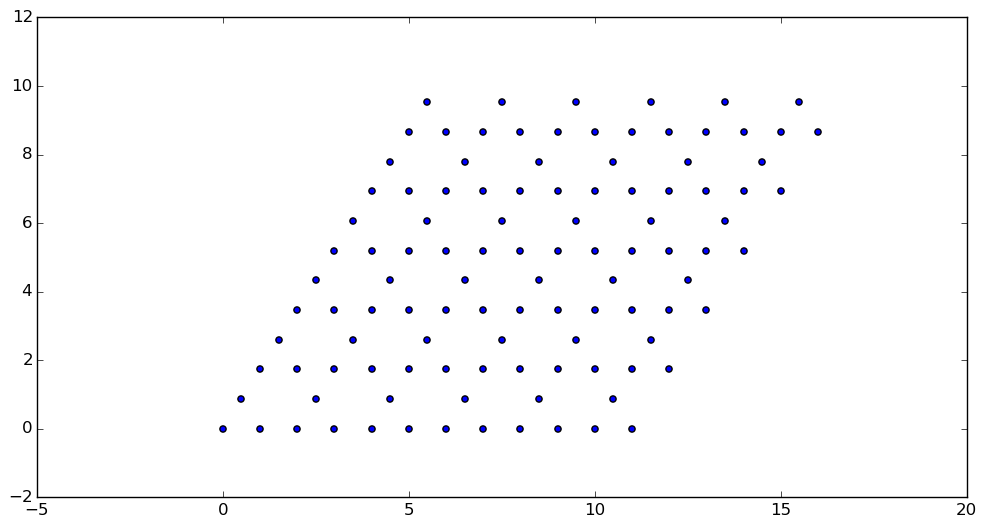

PyObject <matplotlib.collections.PathCollection object at 0x7fa54f172910>

In [49]:
w, h = plt[:figaspect](.5)
figure(figsize=(w,h))
scatter(X[:,1],X[:,2])